# Take a first look at Banking Data csv file

In [118]:
# !pip install pandas
# !pip install matplotlib
# !pip install pandasql

In [119]:
import pandas as pd
from pandasql import sqldf

### First rows

In [120]:
df = pd.read_csv('/Users/chriswatson/Downloads/dataGateDemo_merged.csv',low_memory=False)
df.head(5)

,Unnamed: 0,eventCreateDate,originSystem,operation,isChargeback,operationType,operationCode,userId,accountType,cooperativeId,amount,installment,installmentAmount,description,category,customTransaction,category.imageCode,hashtag.value,storeName,cardMCC
0,0.0,2019-07-01 03:05:44.860,Core,Credito,0.0,Principal,TransferenciaEntreContas,0,Poupanca,818,3.0,NaN,NaN,Transferência Da Conta Corrente Para Poupança,Aplicacao,NaN,Investimentos,NaN,NaN,NaN
1,1.0,2019-07-01 03:05:44.860,Core,Debito,0.0,Principal,TransferenciaEntreContas,0,ContaCorrente,818,-3.0,NaN,NaN,Transferência Da Conta Corrente Para Poupança,Aplicacao,NaN,Investimentos,NaN,NaN,NaN
2,2.0,2019-07-01 03:06:49.577,Core,Credito,0.0,Principal,EfetivarDebitoCredito,1,ContaCorrente,718,200.0,NaN,NaN,Transferência Entre Minhas Contas,TransferenciaMesmoCpf,NaN,Transferencias,NaN,NaN,NaN
3,3.0,2019-07-01 14:08:51.883,Card,Debito,0.0,Principal,CompraNacional,2,ContaCorrente,217,-50.0,1.0,-50.0,Mercadopago *moysestaxisi,AplicativoTransporte,NaN,Transporte,NaN,MERCADOPAGO *MOYSESTAXISI,4121.0
4,4.0,2019-07-01 03:13:30.931,Core,Credito,0.0,Principal,TransferenciaEntreContas,3,Poupanca,116,20.0,NaN,NaN,Transferência Da Conta Corrente Para Poupança,Aplicacao,NaN,Investimentos,NaN,NaN,NaN


### All column names

In [121]:
col_list = df.columns.tolist()
print(col_list)

['Unnamed: 0', 'eventCreateDate', 'originSystem', 'operation', 'isChargeback', 'operationType', 'operationCode', 'userId', 'accountType', 'cooperativeId', 'amount', 'installment', 'installmentAmount', 'description', 'category', 'customTransaction', 'category.imageCode', 'hashtag.value', 'storeName', 'cardMCC']


### Most common values in each column

In [122]:
for col in col_list:
    print(col, df[col].value_counts(dropna=False).head().index.tolist())
    print()

Unnamed: 0 [0.0, 247960.0, 238846.0, 161959.0, 160082.0]

eventCreateDate ['2019-09-05 10:00:15.303', '2019-09-04 10:00:41.246', '2019-09-04 10:00:41.247', '2019-09-04 10:00:54.357', '2019-09-04 10:00:20.746']

originSystem ['Card', 'Core', 'CORE', nan, 'originSystem']

operation ['Debito', 'Credito', 'operation']

isChargeback ['0.0', '1.0', nan, 'isChargeback']

operationType ['Principal', 'Tarifa', 'IOF', nan, 'operationType']

operationCode ['CompraNacional', 'EfetivarDebitoCredito', 'EfetivarDebitoTED', 'TransferenciaEntreContas', 'EfetivarDepositoBoleto']

userId ['71', '1535', '1912', '24', '250']

accountType ['ContaCorrente', 'CartaoDeCredito', 'Poupanca', 'ContaCapital', 'Dinheiro']

cooperativeId ['116', '726', '718', '710', '730']

amount ['-20.0', '-10.0', '20.0', '-50.0', '-100.0']

installment [nan, '1.0', '2.0', '3.0', '4.0']

installmentAmount [nan, '-20.0', '-10.0', '-50.0', '-30.0']

description ['Depósito Por Boleto', 'Transferência Entre Minhas Contas', 'Pagamento 

## Reduce to most important columns for readability

In [123]:
df = df[['userId', 'eventCreateDate', 'originSystem', 'operation', 'operationCode', 'accountType', 'amount', 'description', 'category', 'category.imageCode']]
df.head()

,userId,eventCreateDate,originSystem,operation,operationCode,accountType,amount,description,category,category.imageCode
0,0,2019-07-01 03:05:44.860,Core,Credito,TransferenciaEntreContas,Poupanca,3.0,Transferência Da Conta Corrente Para Poupança,Aplicacao,Investimentos
1,0,2019-07-01 03:05:44.860,Core,Debito,TransferenciaEntreContas,ContaCorrente,-3.0,Transferência Da Conta Corrente Para Poupança,Aplicacao,Investimentos
2,1,2019-07-01 03:06:49.577,Core,Credito,EfetivarDebitoCredito,ContaCorrente,200.0,Transferência Entre Minhas Contas,TransferenciaMesmoCpf,Transferencias
3,2,2019-07-01 14:08:51.883,Card,Debito,CompraNacional,ContaCorrente,-50.0,Mercadopago *moysestaxisi,AplicativoTransporte,Transporte
4,3,2019-07-01 03:13:30.931,Core,Credito,TransferenciaEntreContas,Poupanca,20.0,Transferência Da Conta Corrente Para Poupança,Aplicacao,Investimentos


## Tidy up data

To do list:

- 'Unnamed: 0',         DROP
- 'eventCreateDate',                                  ???
- 'originSystem',           CORE -> Core   No xlate. Dropped value 'originSystem' & NaN
- 'operation',                             Xlated.   Dropped value 'operation'
- 'isChargeback',       DROP
- 'operationType',      DROP
- 'operationCode',       
- 'userId',       
- 'accountType',                           Xlated 3. Dropped all other values
- 'cooperativeId',      DROP
- 'amount',                      Convert string to float
- 'installment',        DROP
- 'installmentAmount',  DROP
- 'description',       
- 'category',       
- 'customTransaction',  DROP
- 'category.imageCode',       
- 'hashtag.value',      DROP
- 'storeName',          DROP
- 'cardMCC'             DROP

### --- Before ---

In [124]:
print('originSystem:',df.originSystem.value_counts().head().index.tolist())

originSystem: ['Card', 'Core', 'CORE', 'originSystem']


In [125]:
print('operation:',df.operation.value_counts().head().index.tolist())

operation: ['Debito', 'Credito', 'operation']


In [126]:
print('accountType:',df.accountType.value_counts().head().index.tolist())

accountType: ['ContaCorrente', 'CartaoDeCredito', 'Poupanca', 'ContaCapital', 'Dinheiro']


### Convert amount from string to float

In [127]:
df.amount = pd.to_numeric(df.amount, errors='coerce')
df.amount.head()

0      3.0
1     -3.0
2    200.0
3    -50.0
4     20.0
Name: amount, dtype: float64

### Translate

#### Operation

In [128]:
df.operation = df.operation.replace(['Debito','Credito'],['Debit','Credit'])

#### Account Type

In [129]:
accountTypes_English = ['CurrentAccount', 'CreditCard', 'SavingsAccount']
df.accountType = df.accountType.replace(['ContaCorrente', 'CartaoDeCredito', 'Poupanca'],accountTypes_English)

#### Category

In [130]:
df.category = df.category.replace(['Outros','OutrosRenda','TransferenciaMesmoCpf','Restaurantes','Mercado','Conveniencia','AplicativoTransporte','PagamentoCredito','Rendimentos','Aplicacao',  'Saques',     'TelefoneTvInternet','Resgate   ','Farmacia','OutrosVestuario','CafesPadarias','OutrosMoradia','Tarifas','EletronicosMoveis','CuidadosPessoais','OutrosTarifasTaxasFinanceiras','Estacionamento','RecargaCelular'     ,'Hospedagem'],
                                  ['Other', 'OtherIncome','TaxTransfer',          'Restaurant',  'Market', 'Convenience', 'TransportApp',        'CreditPayment',   'Interest',   'Application','Withdrawals','TelefoneTvInternet','Redemption', 'Pharmacy','Other Clothing', 'CafesBakeries','OtherHousing', 'Rates',  'MobileElectronics','PersonalCare'    ,'OtherFinancialRateFees'       ,'Parking'       ,'MobilePhoneRecharge','Accommodation'])

#### Operation Code

In [131]:
df.operationCode = df.operationCode.replace(['CompraNacional',   'EfetivarDebitoCredito', 'EfetivarDebitoTED',   'TransferenciaEntreContas', 'EfetivarDepositoBoleto', 'EfetivarCreditoTED',   'EfetivarPagamentoCobranca', 'RendimentoPoupanca', 'LiquidacaoCredito', 'EfetivarSaque', 'EfetivarPagamentoConvenios', 'SaqueNacionalTecban', 'EfetivarRecargaCelular', 'EfetivarPagamentoCapital', 'CobrancaCesta', 'EfetivarLancamentoEmConta', 'ContratacaoEmprestimo', 'CompraInternacional',   'EfetivarDomicilioBancario', 'EfetivarLancamentoAvulsoCartao'],
                                            ['NationalPurchase', 'DebitCredit',           'DebitElectronicXfer', 'TransferBetweenAccounts',  'BankDeposit',            'CreditElectronicXfer', 'PaymentCollection',         'SavingsInterest',    'CreditClearance',   'Withdrawal',    'PaymentAgreement',           'NationalWithdrawal',  'PrepaidMobileRecharge',  'CapitalPayment',           'Collection',    'OpenAccount',               'HireLoan',              'InternationalPurchase', 'DomicileBank',              'CardPayment'])

### Inconsistencies

In [132]:
df.originSystem = df.originSystem.replace(['CORE'],'Core')

### Remove rows with empty or bad values 

In [133]:
df = df[df.originSystem != 'originSystem']
df = df.dropna(subset=['originSystem'])
df = df[df.operation != 'operation']
df = df[df.accountType.isin(accountTypes_English)]
#for col in df.columns:
#    print(col)
#    print(df[df[col].isna()].head(10))
#    print()

### Update dates to 2020
#### Verify all from 2019

In [178]:
print("Min = ",df.eventCreateDate.min(),", Max = ", df.eventCreateDate.max())

Min =  2020-07-01 09:58:27.751 , Max =  2020-11-02 05:05:13.718


So all values are from 2019
#### Change all values to 2020

In [181]:
df.eventCreateDate = df.eventCreateDate.str.replace('2019', '2020')

In [180]:
print("Min = ",df.eventCreateDate.min(),", Max = ", df.eventCreateDate.max())

Min =  2020-07-01 09:58:27.751 , Max =  2020-11-02 05:05:13.718


### --- After --- Updated column values ...

In [134]:
print('originSystem:',df.originSystem.value_counts(dropna=False).head().index.tolist())

originSystem: ['Core', 'Card']


In [135]:
print('operation:',df.operation.value_counts(dropna=False).head().index.tolist())

operation: ['Debit', 'Credit']


In [136]:
print('accountType:',df.accountType.value_counts(dropna=False).head().index.tolist())

accountType: ['CurrentAccount', 'CreditCard', 'SavingsAccount']


In [137]:
for col in ['operationCode','category','category.imageCode']:
    print(col,'\n',df[col].value_counts(dropna=False).head(20).index.tolist())
    print()

operationCode 
 ['NationalPurchase', 'DebitCredit', 'DebitElectronicXfer', 'TransferBetweenAccounts', 'BankDeposit', 'CreditElectronicXfer', 'PaymentCollection', 'SavingsInterest', 'CreditClearance', 'Withdrawal', 'PaymentAgreement', 'NationalWithdrawal', 'PrepaidMobileRecharge', 'CapitalPayment', 'Collection', 'OpenAccount', 'HireLoan', 'InternationalPurchase', 'DomicileBank', 'CardPayment']

category 
 ['Other', 'OtherIncome', 'TaxTransfer', 'Restaurant', 'Market', 'Convenience', 'TransportApp', 'CreditPayment', 'Interest', 'Application', 'Withdrawals', 'TelefoneTvInternet', 'Resgate', 'Pharmacy', 'Other Clothing', 'CafesBakeries', 'OtherHousing', 'Rates', 'MobileElectronics', 'PersonalCare']

category.imageCode 
 [nan, 'Alimentacao', 'Outros', 'Renda', 'Transferencias', 'Investimentos', 'Moradia', 'Transporte', 'Emprestimos', 'SaudeBemEstar', 'TarifasTaxasFinanceiras', 'Vestuario', 'LazerDiversao', 'NegocioProprio', '[]', 'Educacao', 'ProgramaFidelidade', 'PresentesDoacoes', 'Animai

## Further analysis

### Number of unique users

In [138]:
df.userId.nunique()

35518

### Which users have the most entries?

In [139]:
userIds = df.userId.value_counts().reset_index()
userIds.columns = ['userId', 'count']
userIds.head(10)

,userId,count
0,71,5831
1,1535,1015
2,1912,858
3,24,753
4,250,734
5,2140,705
6,79,702
7,12761,670
8,5800,642
9,3751,638


### Number of unique category values and list of the most common

In [140]:
df.category.nunique()

57

In [141]:
print(df.category.value_counts().head(10))

Other            232332
OtherIncome      144435
TaxTransfer      142077
Restaurant       119249
Market            95407
Convenience       53120
TransportApp      50968
CreditPayment     40871
Interest          37332
Application       31212
Name: category, dtype: int64


### All users - Operations

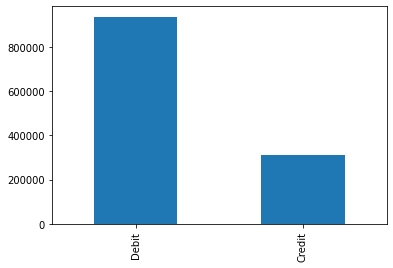

In [142]:
df.operation.value_counts().plot.bar();

### All users - Account Type

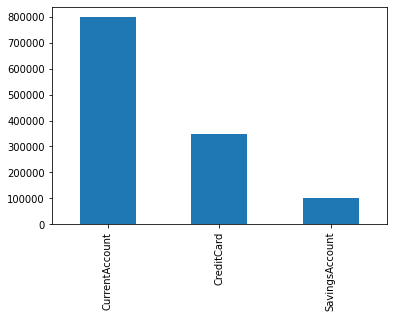

In [143]:
df.accountType.value_counts().plot.bar();

### Top 15 transaction categories

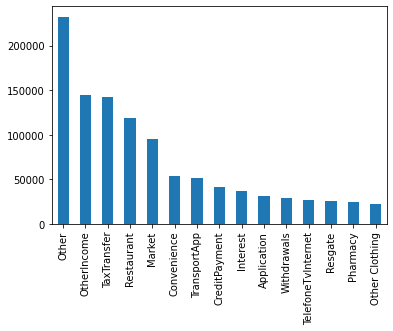

In [144]:
df.category.value_counts().head(15).plot.bar();

## Which 12 users are possibly the "most interesting"?
Rules:
Find users with many transactions and transactional types in different types of account

### Which are the top 3 account types based on #transactions?

In [145]:
at_list = df.accountType.value_counts().head(3).index.tolist()
print(at_list)

['CurrentAccount', 'CreditCard', 'SavingsAccount']


### For each account type find the 10 users with largest number of transactions
#### ...   and for each group the 4 with most transactional types (independent of account type)

In [146]:
interestingUserList=[]
for at in at_list:

    # Find the 10 users with largest number of transactions for this account type 
    userList = df[df.accountType == at].userId.value_counts().head(10).index.tolist()

    # Find the top 4 subset of these users with the most transactional types  
    iUL = df[df.userId.isin(userList)].groupby('userId').category.nunique().sort_values(ascending=False).head(4).index.tolist()
    interestingUserList.append(iUL)

print(interestingUserList)

[['2140', '12761', '1471', '5800'], ['1103', '18615', '1833', '14156'], ['250', '27344', '14140', '12155']]


## Let's combine users and then take a look ...

In [147]:
print("Rows: ",len(df))

Rows:  1249665


#### Only leave rows involving user entries in interestingUserList

In [148]:
df = df[df.userId.isin([item for sublist in interestingUserList for item in sublist])]
print("Rows: ",len(df))

Rows:  5508


#### Aggregate users. New ids = 99990, 99991, 99992, 99993 

In [149]:
for grp in 0,1,2,3:
    ul = [el[grp] for el in interestingUserList]
    print(ul,'=>','9999'+str(grp))
    df.userId = df.userId.replace(ul,'9999'+str(grp))
#df.head()

['2140', '1103', '250'] => 99990
['12761', '18615', '27344'] => 99991
['1471', '1833', '14140'] => 99992
['5800', '14156', '12155'] => 99993


### Number of unique users

In [150]:
df.userId.nunique()

4

### Which users have the most entries?

In [151]:
userIds = df.userId.value_counts().reset_index()
userIds.columns = ['userId', 'count']
userIds

,userId,count
0,99990,1848
1,99992,1275
2,99991,1210
3,99993,1175


### Most common values in each column

In [152]:
col_list = df.columns.tolist()
for col in col_list:
    print(col, df[col].value_counts(dropna=False).head(10).index.tolist())
    print()

userId ['99990', '99992', '99991', '99993']

eventCreateDate ['2019-09-02 17:06:55.644', '2019-09-03 19:21:13.527', '2019-09-04 19:23:15.373', '2019-08-07 12:44:16.301', '2019-09-17 16:30:20.666', '2019-09-03 19:27:55.731', '2019-09-03 19:24:32.566', '2019-10-15 19:07:48.046', '2019-09-02 11:34:52.666', '2019-09-02 15:26:10.010']

originSystem ['Card', 'Core']

operation ['Debit', 'Credit']

operationCode ['NationalPurchase', 'DebitElectronicXfer', 'TransferBetweenAccounts', 'CardPayment', 'CreditElectronicXfer', 'DebitCredit', 'Withdrawal', 'PaymentCollection', 'BankDeposit', 'SavingsInterest']

accountType ['CurrentAccount', 'SavingsAccount', 'CreditCard']

amount [-500.0, -50.0, -100.0, -30.0, -1000.0, -200.0, -20.0, -10.0, -15.0, -2.0]

description ['Uber Do Brasil Tecnologia', 'Transferência Ted Para Salvador Medeiros Cardoso Filho', 'Transferência Da Poupança Para Conta Corrente', 'Transferência Da Conta Corrente Para Poupança', 'Pagamento De Boletos', 'Depósito Por Boleto', 'Est

### Number of unique category values

In [153]:
df.category.nunique()

42

### Merged users - Operations

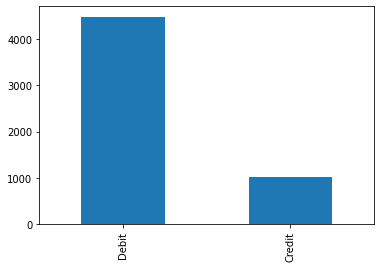

In [154]:
df.operation.value_counts().plot.bar();

### Merged users - Account Type

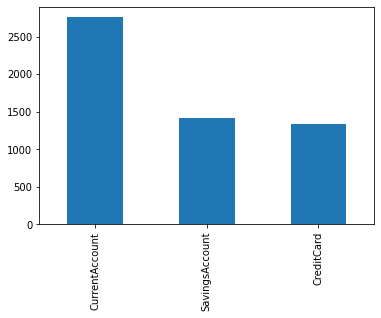

In [155]:
df.accountType.value_counts().plot.bar();

### Merged users - Top 15 transaction categories

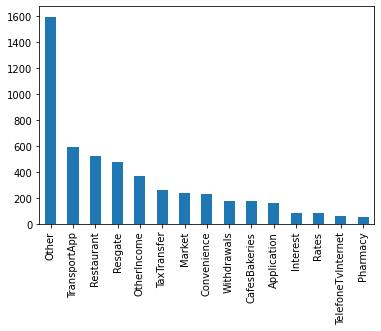

In [156]:
df.category.value_counts().head(15).plot.bar();

### Merged users - Transaction amount (bucketed and log scale)

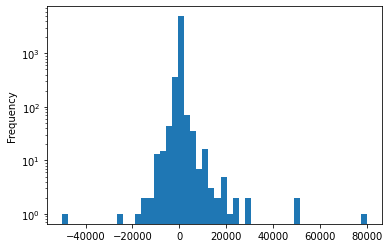

In [157]:
df.amount.plot(kind='hist',bins=50,logy=True);

#### Let's remove the outliers >20000 or <-20000

In [158]:
print("Rows = ",len(df))

Rows =  5508


In [159]:
df = df[abs(df.amount) < 20000]

In [160]:
print("Rows = ",len(df))

Rows =  5494


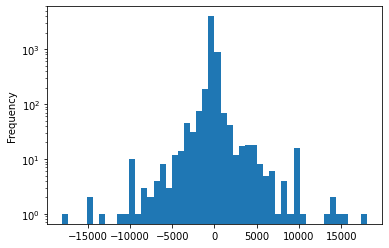

In [161]:
df.amount.plot(kind='hist',bins=50,logy=True);

### Who spends the most?

#### Sum of all credits and debits per user 

In [183]:
df[['userId','amount']].head()

,userId,amount
287,99990,0.05
1352,99990,2.00
1382,99990,56.37
1966,99992,-37.10
2670,99992,-50.00


In [186]:
#df[['userId','amount']].gt(0)

In [163]:
#### Largest single payments

### Remove transactions to make only 2 more needed to make it the 2nd lowest

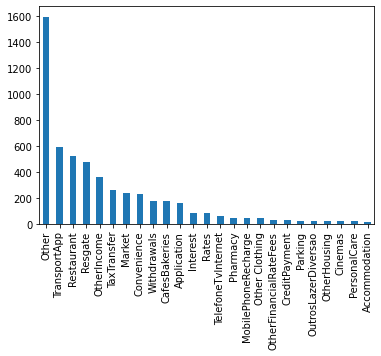

In [167]:
#df.category.value_counts().head(15).plot.bar();
df.category.value_counts().head(25).plot.bar();

### *** To Do ***

## SQL

### Ids

In [175]:
sqldf("select userId, count(*) as 'Transactions' from df group by userId")

,userId,Transactions
0,99990,1842
1,99991,1204
2,99992,1273
3,99993,1175


In [177]:
sql = """
SELECT userId, category, COUNT(category) AS Number
FROM df 
WHERE userId = '99993' 
GROUP BY category
ORDER BY Number DESC
LIMIT 15
"""

sqldf(sql)

,userId,category,Number
0,99993,Other,476
1,99993,TransportApp,222
2,99993,OtherIncome,100
3,99993,Restaurant,68
4,99993,TaxTransfer,66
5,99993,Withdrawals,46
6,99993,Market,45
7,99993,Convenience,21
8,99993,MobilePhoneRecharge,21
9,99993,Rates,19


In [171]:
# How to show changes - Switch dates

In [172]:
# Add transactions to make only 2 more needed to make it the 2nd lowest

## Export processed data

In [174]:
df.to_csv('/Users/chriswatson/Downloads/dataGateDemo_4users.csv')